In [73]:
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn 
import numpy as np
import pandas as pd

In [74]:
dataset=pd.read_csv("Churn.csv")

In [75]:
dataset.drop(columns=["RowNumber", "CustomerId", "Surname", ], axis=1, inplace=True)

<Axes: >

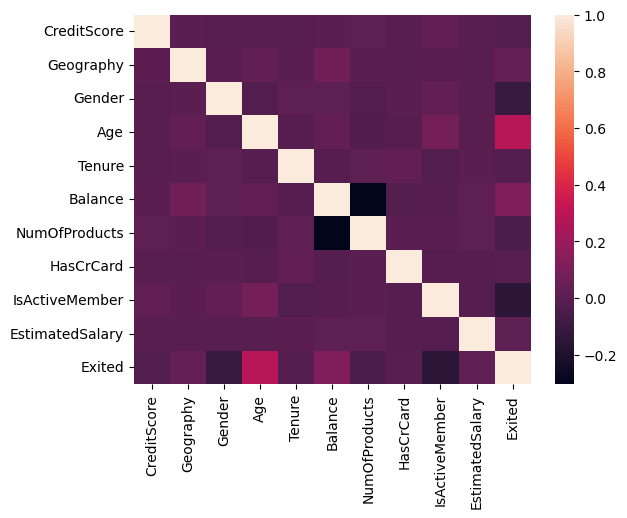

In [76]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset["Geography"]=le.fit_transform(dataset["Geography"])
dataset["Gender"]=le.fit_transform(dataset["Gender"])
corr=dataset.corr()
sns.heatmap(corr)

In [77]:
x=dataset.iloc[:, :-1]
y=dataset.iloc[:, -1]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [78]:
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [79]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=StandardScaler().fit_transform(x)

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=34, test_size=0.3)

In [81]:
from sklearn.svm import SVC
model=SVC(kernel="rbf")

In [82]:
model.fit(x_train, y_train)

SVC()

In [83]:
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8563333333333333

<Axes: >

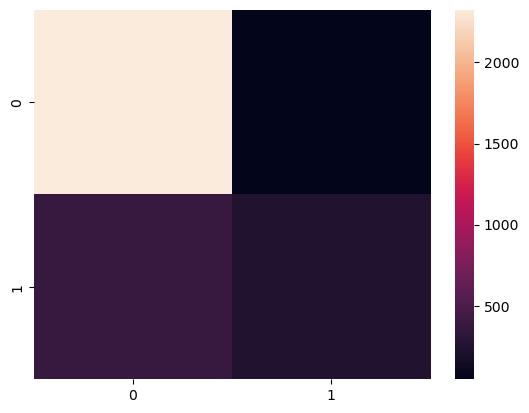

In [84]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm)